# DrScratch++ Metrics

## Documentation

### Steps for preproccess the data
1. Collect the data from Drive
   
    1. I have taken the file **CT4ALL-Master Spreadsheet**, and then i have concatenated each tab (from Adamson to Chaffe Toulmin) in order to crate a single spreadsheet. The name of the file that storage this is: *CT4ALL-Master Spreadsheet.csv*
    2. After this i have triangulated the master_df with the triang_df, **i have chosen the index *'Game Project Link'* instead of *'Project ID'* because there was projects  with game links and no IDs in the BIG_ct4all_master.csv**

2. Extract *Game links* for batch-mode

    1. Saved in file **batch_master_links.txt**
        - There are several projects with diferent urls but same project names, we have follow the indications add (1).sb3, (2).sb3 etc..
  
3. Create **Game Attributes** csv:

    - There's a problem with the project names, this is that there are several projects with the same name but different links, this affects to the web scrapping script, and all the organzation. The pattern followed for repeated project names it's *name_(1).sb3, name_(2).sb3* and so on. This is why a script now has to be created to synchronize these repeated projects automatically in the csv, taking into account the chosen pattern. (I want to go to sleep)
    - After download projects, create a csv with the each url and his project name. (This it's necessary for triangulate with the metrics csv from DrScratch analysis, i mean each url with own name and result
    - We have to separate de two possible genre of games.

4. Triangulate **Game Attributes** csv with **DrScratch Metrics** csv

### Steps for graph the data

5. Create **subsets** according to each *Main Genre* and *Second Genre*

6. Graph in different chars.

    - 6.1. Spider chart
        - All projects.
        - Graph Main Genre.
        - Graph Second Genre.
    
    - 6.2 Heatmap chart.
        - All projects.
        - Graph Main Genre.
        - Graph Second Genre.

    - 6.3 Histogram and KDE Plot chart.
        - All projects.
        - Graph Main Genre.
        - Graph Second Genre.

### QUESTIONS
    - Is the game genre good?, because there are main genres that are "Storytelling, Action" in a single column
    - Why there are so many projects 640!!!???
    - In the paper, what is D0, D1, D2, ...

In [1]:
import pandas as pd

## 1. Collect and import data

In [2]:
projects_list_df = pd.read_csv('projects_list.csv')

## 2. Extract *Game links* for batch-mode

In [3]:
# 2. Extract *Game links* for batch-mode
game_links = projects_list_df['Link']
game_genre = projects_list_df['Genre']

## 3. Create **Game Attributes** csv:

#### Create names with pattern for avoid repeated names

#### Create a pd column for check if that project name exists in the folder (NEW_METRICS/projects_sb3

## 4. Triangulate **Game Attributes** csv with **DrScratch++ Metrics** main.csv

In [9]:
# Import DrScratch metrics
metrics_new = pd.read_csv('./4d6dfd82-a2d7-400c-b4ce-5d2cd4f9a2b0_20240830164457/main.csv')
metrics_old = pd.read_csv('./paper-csv-old-metrics.csv')

print(metrics_new.head)

<bound method NDFrame.head of                                           url                   filename  \
0  https://scratch.mit.edu/projects/165070872         Carbon Clicker.sb3   
1  https://scratch.mit.edu/projects/218168859  Adventures of TreeGuy.sb3   
2  https://scratch.mit.edu/projects/129177311   Save the Atmosphere!.sb3   
3  https://scratch.mit.edu/projects/212068226          Ice Cap Hero!.sb3   
4  https://scratch.mit.edu/projects/143170691         Carbon Crusher.sb3   
5  https://scratch.mit.edu/projects/210270408             Pet Earth!.sb3   
6  https://scratch.mit.edu/projects/213865007     Amanda and Joyce-2.sb3   
7  https://scratch.mit.edu/projects/213497977      heewon and audrey.sb3   
8  https://scratch.mit.edu/projects/142790748            Albedo Pong.sb3   
9  https://scratch.mit.edu/projects/213257497   Anjali and Mariana-3.sb3   

   points Abstraction Parallelism Logic Synchronization Flow control  \
0      17         1/4         4/4   1/4             3/4      

In [10]:
metrics_new_attr = pd.merge(projects_list_df, metrics_new, left_on='Link', right_on='url', how='outer')
metrics_old_attr = pd.merge(projects_list_df, metrics_old, left_on='Link', right_on='url', how='outer')

print(metrics_new_attr)

                                         Link                   Name  \
0  https://scratch.mit.edu/projects/129177311   Save The Atmosphere!   
1  https://scratch.mit.edu/projects/142790748            Albedo Pong   
2  https://scratch.mit.edu/projects/143170691         Carbon Crusher   
3  https://scratch.mit.edu/projects/165070872         Carbon Clicker   
4  https://scratch.mit.edu/projects/210270408             Per Earth!   
5  https://scratch.mit.edu/projects/212068226          Ice Cap Hero!   
6  https://scratch.mit.edu/projects/213257497             CO2 Pacman   
7  https://scratch.mit.edu/projects/213497977      Plants vs Zomseas   
8  https://scratch.mit.edu/projects/213865007   Eco Friendly Choices   
9  https://scratch.mit.edu/projects/218168859  Adventures of TreeGuy   

               Genre                                         url  \
0  Swipe Elimination  https://scratch.mit.edu/projects/129177311   
1               Pong  https://scratch.mit.edu/projects/142790748   
2  

In [11]:
metrics_new_attr.to_csv('metrics_new_attr.csv')
metrics_old_attr.to_csv('metrics_old_attr.csv')

## 5. Create **subsets** according to each *Main Genre* and *Second Genre*

In [12]:
# Firs we are going to create the subsets for Main Genre
main_genres = metrics_new_attr['Genre'].dropna().unique()
main_genres_subsets = {}
for genre in main_genres:
    if genre != None:
        main_genres_subsets[genre] = metrics_new_attr[metrics_new_attr['Genre'] == genre]

main_genres_old = metrics_old_attr['Genre'].dropna().unique()
main_genres_subsets_old = {}
for genre in main_genres_old:
    if genre != None:
        main_genres_subsets_old[genre] = metrics_old_attr[metrics_old_attr['Genre'] == genre]
        
print(main_genres_subsets_old)



{'Swipe Elimination':                                          Link                  Name  \
0  https://scratch.mit.edu/projects/129177311  Save The Atmosphere!   

               Genre                                         url  \
0  Swipe Elimination  https://scratch.mit.edu/projects/129177311   

                   filename  points Abstraction Parallelism Logic  \
0  Save the Atmosphere!.sb3      19         1/3         3/3   3/3   

  Synchronization Flow control User interactivity Data representation  
0             3/3          3/3                3/3                 3/3  , 'Pong':                                          Link         Name Genre  \
1  https://scratch.mit.edu/projects/142790748  Albedo Pong  Pong   

                                          url         filename  points  \
1  https://scratch.mit.edu/projects/142790748  Albedo Pong.sb3      15   

  Abstraction Parallelism Logic Synchronization Flow control  \
1         1/3         1/3   3/3             2/3         

## 6. Graph each subset (DrScratch metrics of each Game Genre).

### 6.1. Graph **Spider Graph**

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 6.1.1. All projects

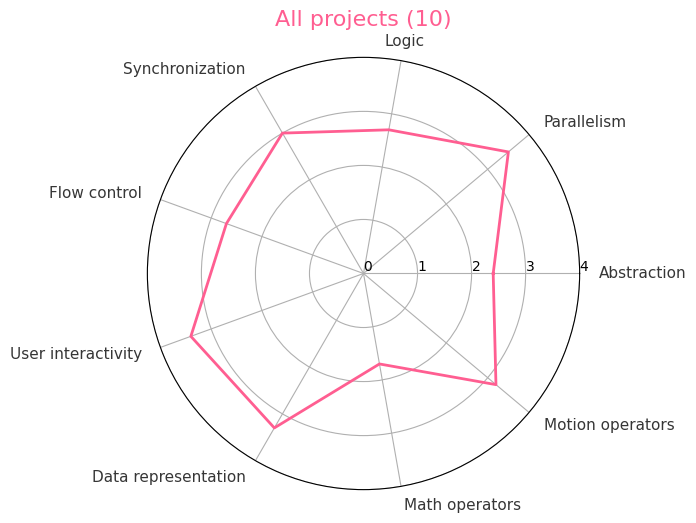

In [14]:
# CHOOSE DATAFRAME
df = metrics_new_attr
# DATA PREPROCESSING
dims = df.iloc[:, 6:15]
dims_names = dims.columns.tolist()
dim_means = dims.apply(lambda x: x.str.split('/').str[0].astype(float)).mean()
dim_means = dim_means.tolist()
dim_means = [round(n,2) for n in dim_means]

# ADAPTIONS TO GRAPH NAMES
cat = dims_names
val = dim_means

# GRAPH
num_vars = len(cat)
angles = [n * 2 * np.pi / num_vars for n in range(num_vars)]
angles += angles[:1]
val += val[:1]
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
ax.plot(angles, val, color='#ff5e91', linewidth=2)  
ax.set_rlabel_position(0)  

# DESIGN
ax.set_ylim(0, 4) 
ax.set_yticks(np.arange(0, 5, 1))
plt.title('All projects (10)', fontsize=16, color='#ff5e91')
ax.set_xticks(angles[:-1])
ax.set_xticklabels(dims, fontsize=11, color='#363636')
for label, angle in zip(ax.get_xticklabels(), angles):
    dim_name = label.get_text()
    if dim_name in ["Parallelism","Abstraction", "Math operators", "Motion operators"]:
        label.set_horizontalalignment('left')
    elif dim_name in ["Synchronization", "Flow control", "User interactivity", "Data representation"]:
        label.set_horizontalalignment('right')



# ADJUST DESIGN
plt.tight_layout()

plt.savefig(f'./figs_new_metrics/all_projects.png')
# SHOW GRAPH
plt.show()

#### 6.1.2. Main Genre

Save The Atmosphere!


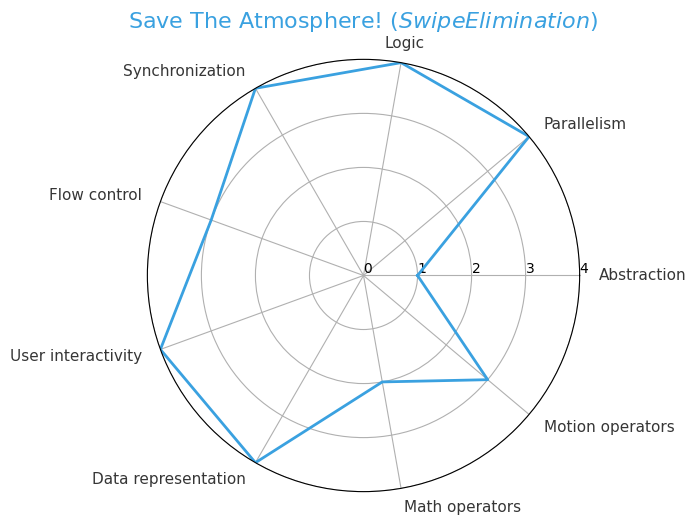

Albedo Pong


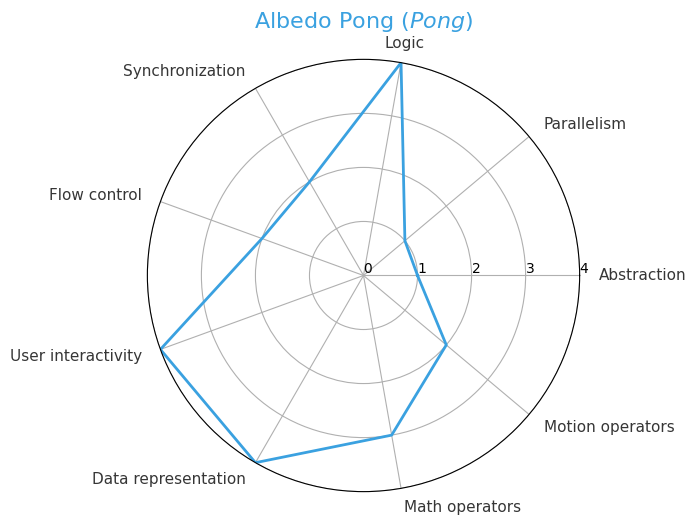

Carbon Crusher


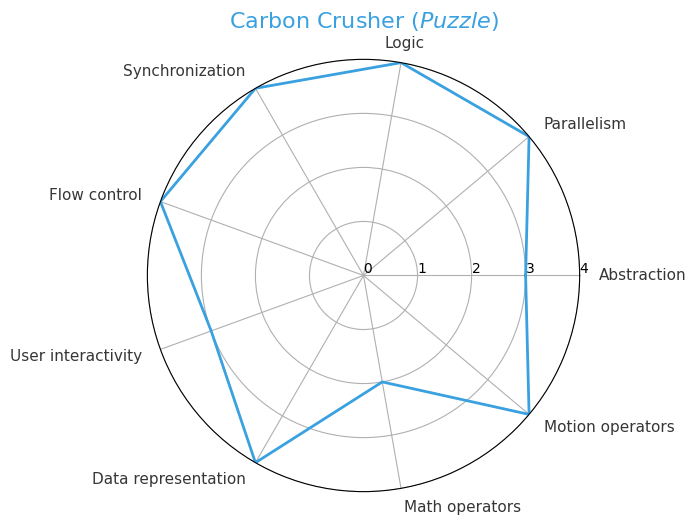

Carbon Clicker


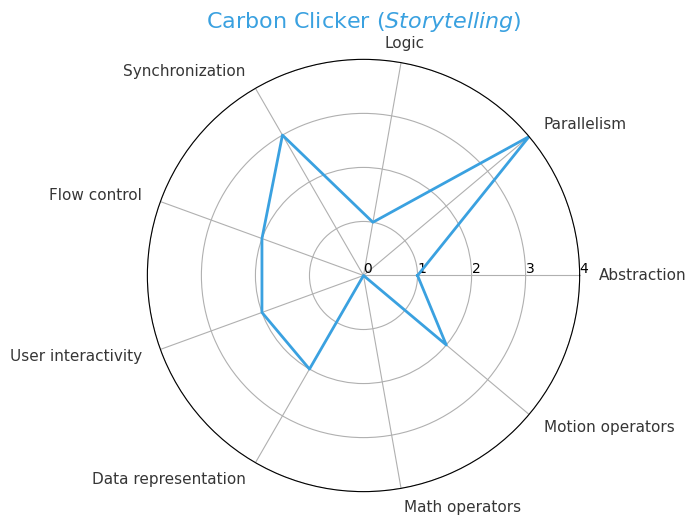

Per Earth!


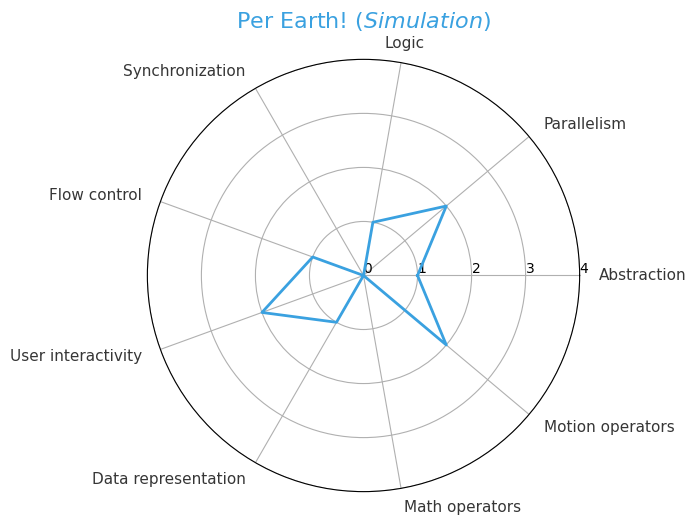

Ice Cap Hero!


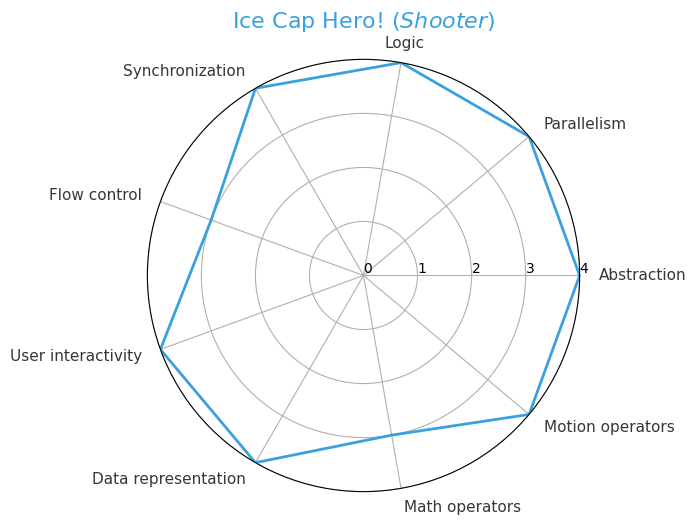

CO2 Pacman


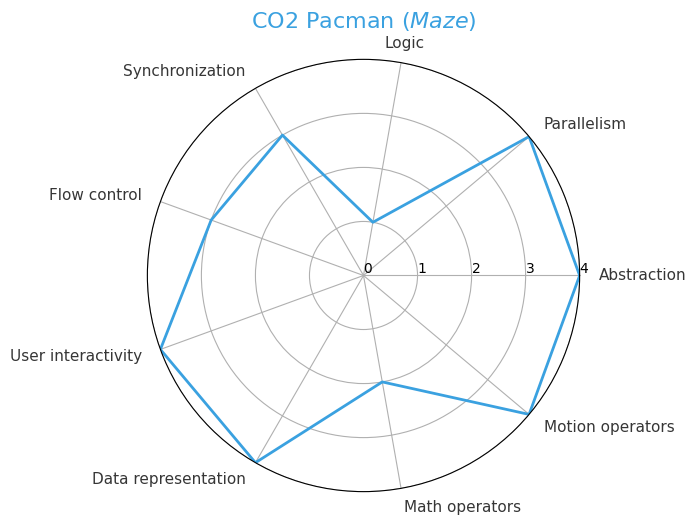

Plants vs Zomseas


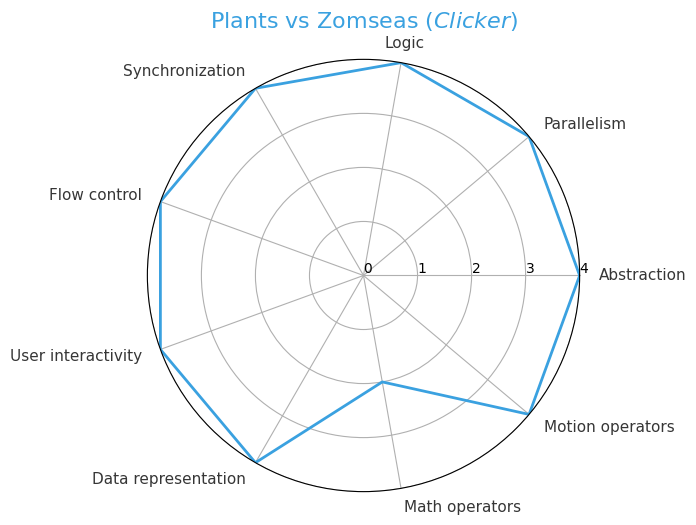

Eco Friendly Choices


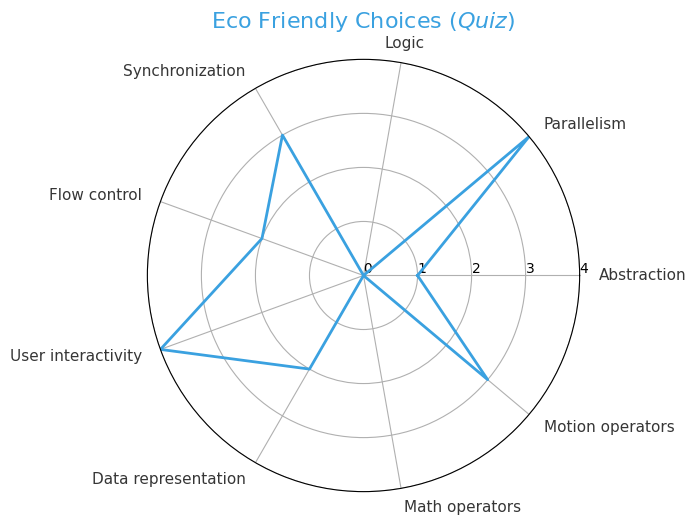

Adventures of TreeGuy


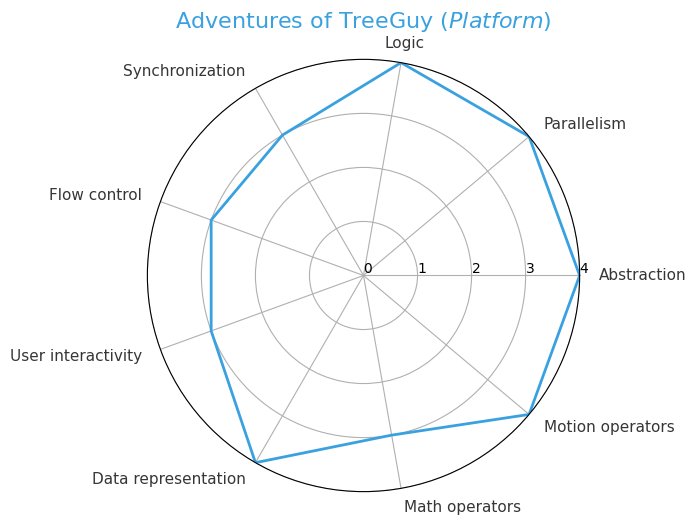

In [15]:
# CHOOSE DATAFRAME
for name, df in main_genres_subsets.items():
    # DATA PREPROCESSING
    project_name = df['Name'].tolist()[0]
    print(project_name)
    dims = df.iloc[:, 6:15]
    dims_names = dims.columns.tolist()
    dim_means = dims.apply(lambda x: x.str.split('/').str[0].astype(float)).mean()
    dim_means = [round(n,2) for n in dim_means]
    
    # ADAPTIONS TO GRAPH NAMES
    cat = dims_names
    val = dim_means
    
    # GRAPH
    num_vars = len(cat)
    angles = [n * 2 * np.pi / num_vars for n in range(num_vars)]
    angles += angles[:1]
    val += val[:1]
    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
    ax.plot(angles, val, color='#3aa1e0', linewidth=2)  
    ax.set_rlabel_position(0)  
    
    # DESIGN
    ax.set_ylim(0, 4) 
    ax.set_yticks(np.arange(0, 5, 1))
    plt.title(f'{project_name} ($\\it{{{name}}}$)', fontsize=16, color='#3aa1e0')
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(dims, fontsize=11, color='#363636')
    for label, angle in zip(ax.get_xticklabels(), angles):
        dim_name = label.get_text()
        if dim_name in ["Parallelism","Abstraction", "Math operators", "Motion operators"]:
            label.set_horizontalalignment('left')
        elif dim_name in ["Synchronization", "Flow control", "User interactivity", "Data representation"]:
            label.set_horizontalalignment('right')
   

    
    # ADJUST DESIGN
    plt.tight_layout()

    plt.savefig(f'./figs_new_metrics/{name}.png')
    # SHOW GRAPH
    plt.show()
   

# OLD METRICS

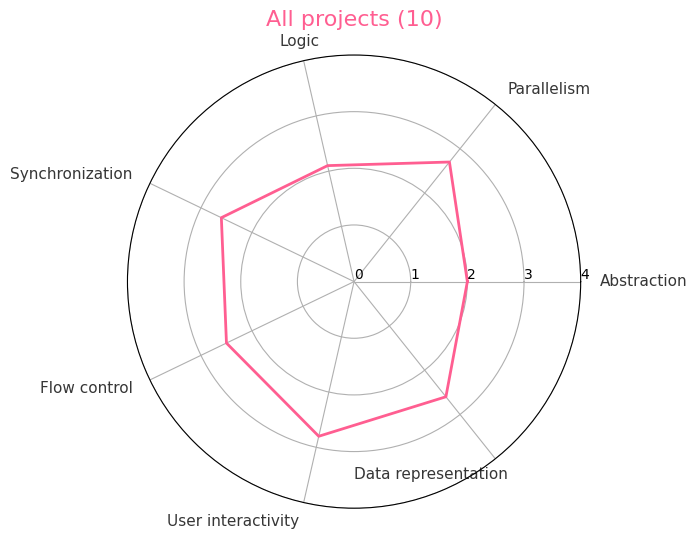

In [16]:
# CHOOSE DATAFRAME
df = metrics_old_attr
# DATA PREPROCESSING
dims = df.iloc[:, 6:13]
dims_names = dims.columns.tolist()
dim_means = dims.apply(lambda x: x.str.split('/').str[0].astype(float)).mean()
dim_means = dim_means.tolist()
dim_means = [round(n,2) for n in dim_means]

# ADAPTIONS TO GRAPH NAMES
cat = dims_names
val = dim_means

# GRAPH
num_vars = len(cat)
angles = [n * 2 * np.pi / num_vars for n in range(num_vars)]
angles += angles[:1]
val += val[:1]
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
ax.plot(angles, val, color='#ff5e91', linewidth=2)  
ax.set_rlabel_position(0)  

# DESIGN
ax.set_ylim(0, 4) 
ax.set_yticks(np.arange(0, 5, 1))
plt.title('All projects (10)', fontsize=16, color='#ff5e91')
ax.set_xticks(angles[:-1])
ax.set_xticklabels(dims, fontsize=11, color='#363636')
for label, angle in zip(ax.get_xticklabels(), angles):
    dim_name = label.get_text()
    if dim_name in ["Parallelism","Abstraction", "Math operators", "Motion operators"]:
        label.set_horizontalalignment('left')
    elif dim_name in ["Synchronization", "Flow control", "User interactivity", "Data representation"]:
        label.set_horizontalalignment('right')



# ADJUST DESIGN
plt.tight_layout()

plt.savefig(f'./figs_old_metrics/all_projects.png')
# SHOW GRAPH
plt.show()

Save The Atmosphere!


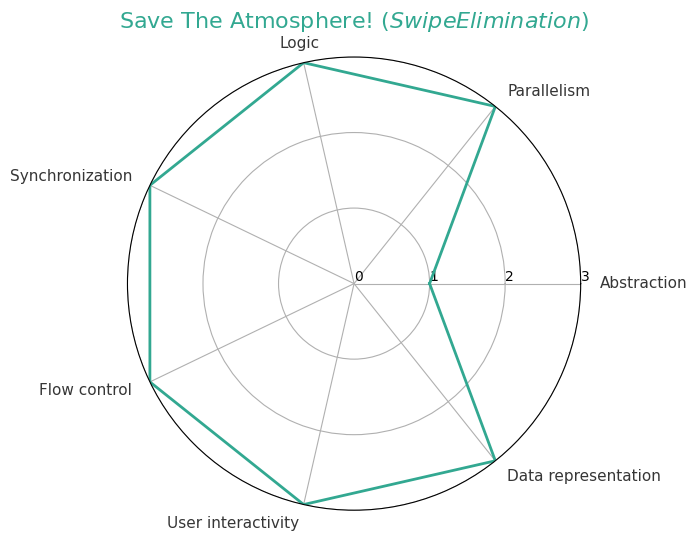

Albedo Pong


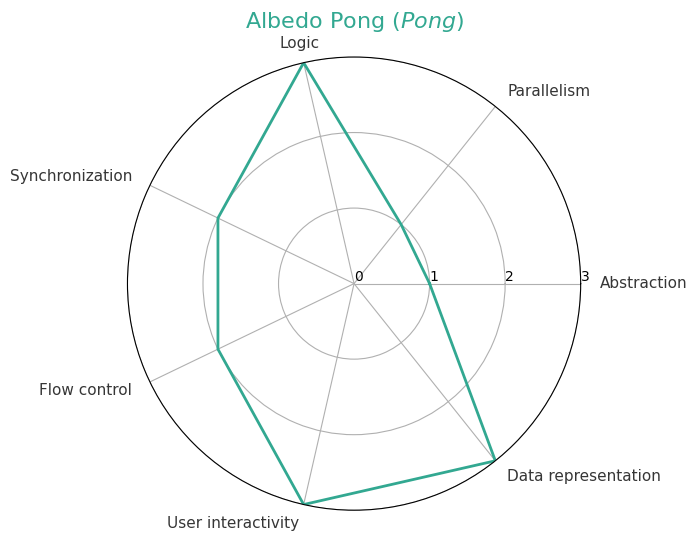

Carbon Crusher


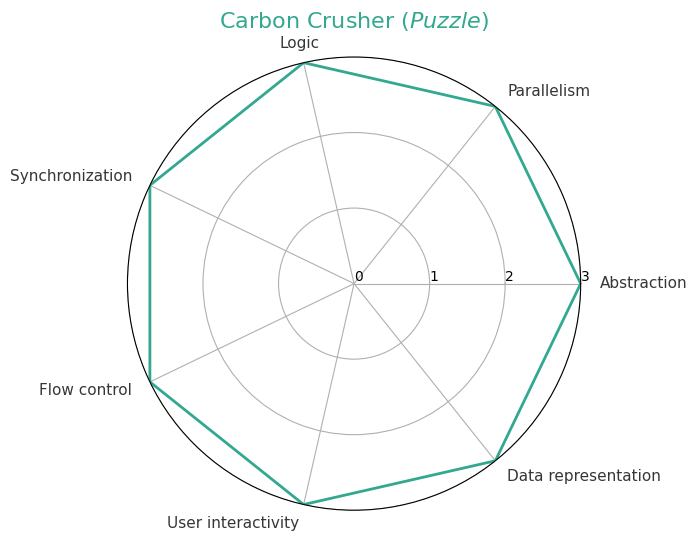

Carbon Clicker


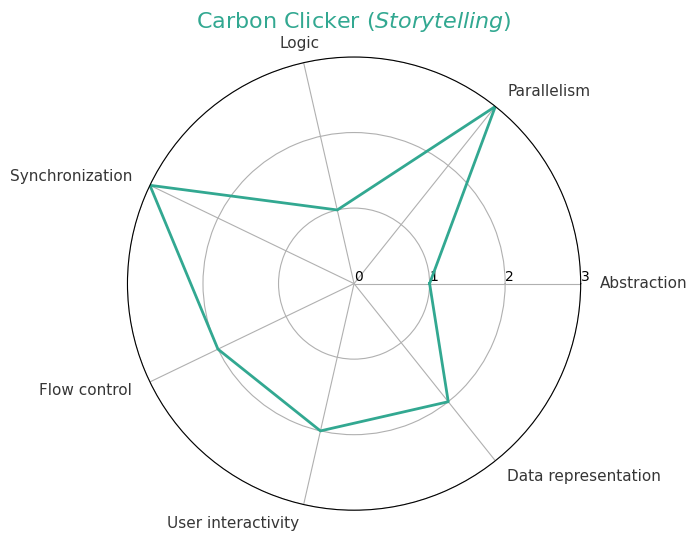

Per Earth!


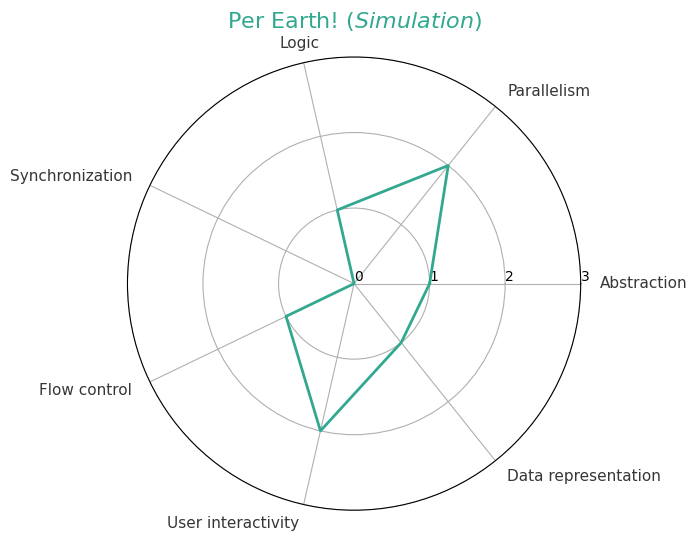

Ice Cap Hero!


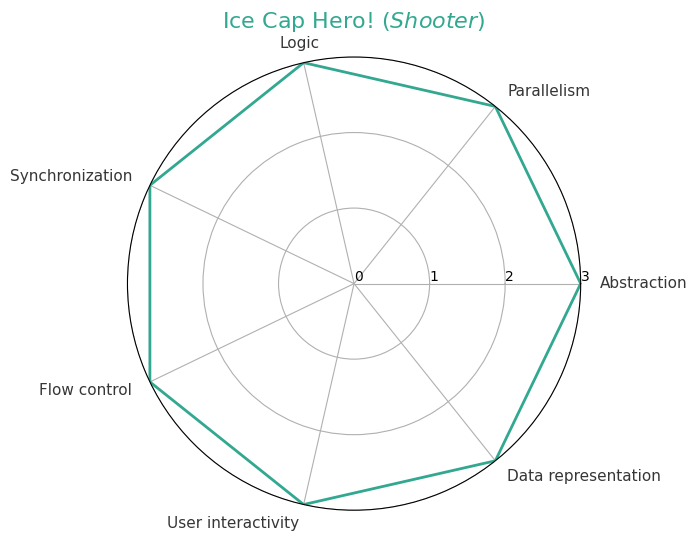

CO2 Pacman


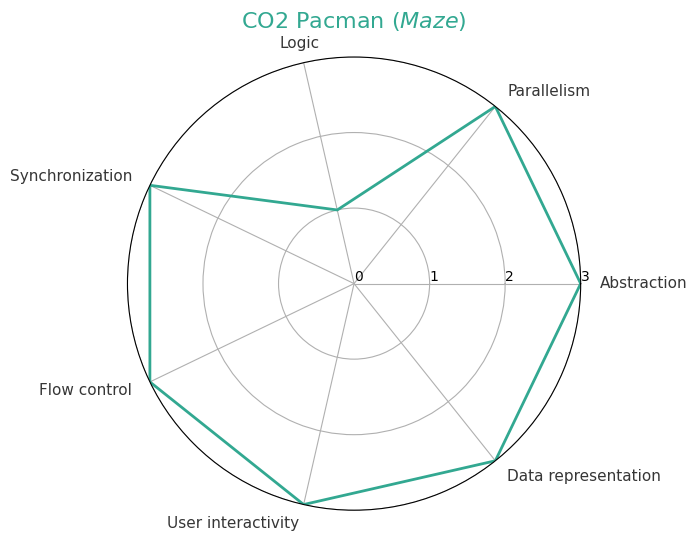

Plants vs Zomseas


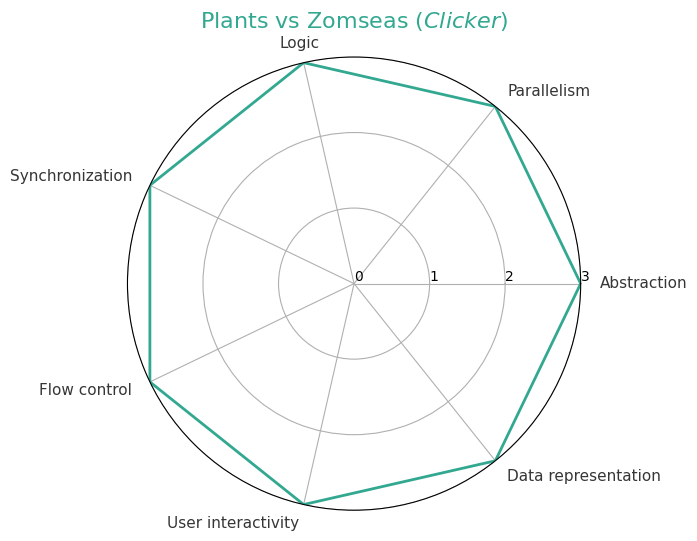

Eco Friendly Choices


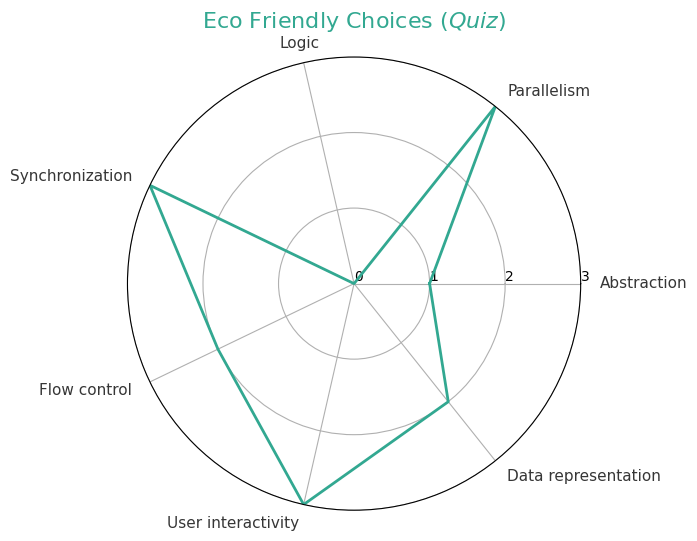

Adventures of TreeGuy


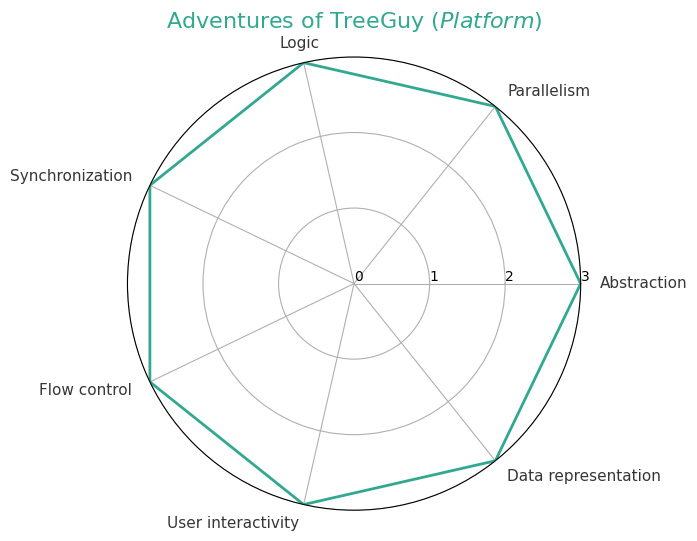

In [19]:
# CHOOSE DATAFRAME
for name, df in main_genres_subsets_old.items():
    # DATA PREPROCESSING
    project_name = df['Name'].tolist()[0]
    print(project_name)
    dims = df.iloc[:, 6:15]
    dims_names = dims.columns.tolist()
    dim_means = dims.apply(lambda x: x.str.split('/').str[0].astype(float)).mean()
    dim_means = [round(n,2) for n in dim_means]
    
    # ADAPTIONS TO GRAPH NAMES
    cat = dims_names
    val = dim_means
    
    # GRAPH
    num_vars = len(cat)
    angles = [n * 2 * np.pi / num_vars for n in range(num_vars)]
    angles += angles[:1]
    val += val[:1]
    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
    ax.plot(angles, val, color='#32a891', linewidth=2)  
    ax.set_rlabel_position(0)  
    
    # DESIGN
    ax.set_ylim(0, 3) 
    ax.set_yticks(np.arange(0, 4, 1))
    plt.title(f'{project_name} ($\\it{{{name}}}$)', fontsize=16, color='#32a891')
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(dims, fontsize=11, color='#363636')
    for label, angle in zip(ax.get_xticklabels(), angles):
        dim_name = label.get_text()
        if dim_name in ["Parallelism","Abstraction", "Math operators", "Motion operators", "Data representation"]:
            label.set_horizontalalignment('left')
        elif dim_name in ["Synchronization", "Flow control", "User interactivity"]:
            label.set_horizontalalignment('right')
   

    
    # ADJUST DESIGN
    plt.tight_layout()

    plt.savefig(f'./figs_old_metrics/{name}.png')
    # SHOW GRAPH
    plt.show()